In [42]:
from selenium import webdriver
from bs4 import BeautifulSoup

In [43]:
driver = webdriver.Chrome('chromedriver')
url = 'https://www.daum.net/'
driver.get(url)

In [44]:
search_window = driver.find_element_by_xpath('//*[@id="q"]')
search_button = driver.find_element_by_xpath('/html/body/div[2]/header/div[1]/div/div[1]/form/fieldset/div/div/button[2]')

In [45]:
search_window.send_keys('미세먼지')
search_button.click()

In [46]:
# 뉴스 펼쳐보기
second_link = driver.find_element_by_xpath('//*[@id="newsExtendView"]')
second_link.click()
third_link = driver.find_element_by_xpath('//*[@id="newsExtendView"]')
third_link.click()

In [47]:
page = driver.page_source
soup = BeautifulSoup(page, "lxml")
soup.title

<title>미세먼지 – Daum 검색</title>

In [48]:
all_news = soup.find_all("ul", id="container")
all_news[0]

<ul class="list_news" id="container"> <li> <div class="wrap_thumb" id="news_img_0"> <a class="thumb_bf" href="https://cp.news.search.daum.net/p/110630320" onclick='smartLog(this, "dc=NNS&amp;p=13&amp;d=26AXYmsa3TsXZjELaO&amp;pg=1&amp;r=1&amp;rc=4&amp;e1=164XpJ7srH-oHbQgai&amp;e3=0&amp;ext=dsid=26AXYmsa3TsXZjELaO", event, {"cpid": {"value": "164XpJ7srH-oHbQgai"}});' target="_blank"> <img alt="" class="thumb_img" data-size="80x80" height="80" onerror="SF.errorImage(this)" src="https://search2.daumcdn.net/thumb/P200x200/?fname=https%3A%2F%2Fsearch1.kakaocdn.net%2Fargon%2F200x200_85_c%2F9ULedjPDjyE0" width="80"/> </a> </div> <div class="wrap_cont"> <a class="tit_main fn_tit_u" href="https://cp.news.search.daum.net/p/110630320" onclick='smartLog(this, "dc=NNS&amp;p=14&amp;d=26AXYmsa3TsXZjELaO&amp;pg=1&amp;r=1&amp;rc=4&amp;e1=164XpJ7srH-oHbQgai&amp;e3=0&amp;ext=dsid=26AXYmsa3TsXZjELaO", event, {"cpid": {"value": "164XpJ7srH-oHbQgai"}});' target="_blank"> 09월 11일 토요일, 오늘의 날씨와 <b>미세</b><b>먼지</

In [49]:
news_title = all_news[0].find_all("a", class_="tit_main fn_tit_u")[1]
news_title.text

' 남양주시, 노후경유차 대상 미세먼지 감축 사업 총력 '

In [50]:
news_title = all_news[0].find_all("a", class_="tit_main fn_tit_u")

In [51]:
news_title_list = []
for one in news_title:
    tmp = one.text
    news_title_list.append(tmp)

len(news_title_list)

12

In [52]:
import pandas as pd

In [53]:
dict_dat = {"미세먼지 뉴스 타이틀" : news_title_list}
dat = pd.DataFrame(dict_dat)
dat.to_csv("미세먼지 뉴스 타이틀.csv", index=False)
dat.to_excel("미세먼지 뉴스 타이틀.xlsx", index=False)

In [54]:
# wordcloud
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

In [55]:
f = open("미세먼지 뉴스 타이틀.csv", encoding="utf-8")
#f = open("미세먼지 뉴스 타이틀.csv", 'r', encoding='utf-8')
text = f.read()
f.close()

In [56]:
from matplotlib import rc
rc('font', family='NanumGothic')

(-0.5, 399.5, 199.5, -0.5)

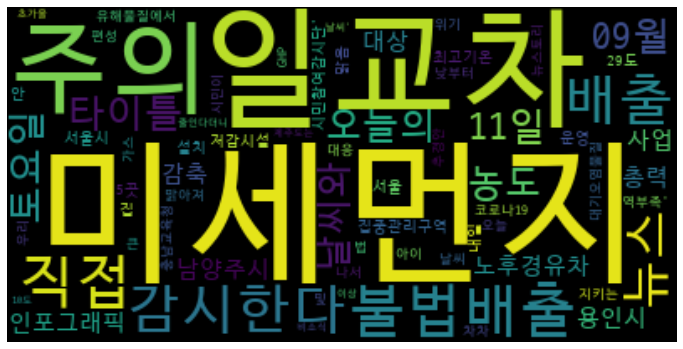

In [57]:
%matplotlib inline
from wordcloud import WordCloud
wcloud = WordCloud('D2Coding.ttf', max_words=1000, relative_scaling = 0.2).generate(text)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")